# A Practical Introduction to Using Deep Learning for Radiology (Part 2)
Next Steps - Previous Attempts - Future Directions

---

*What's next?*

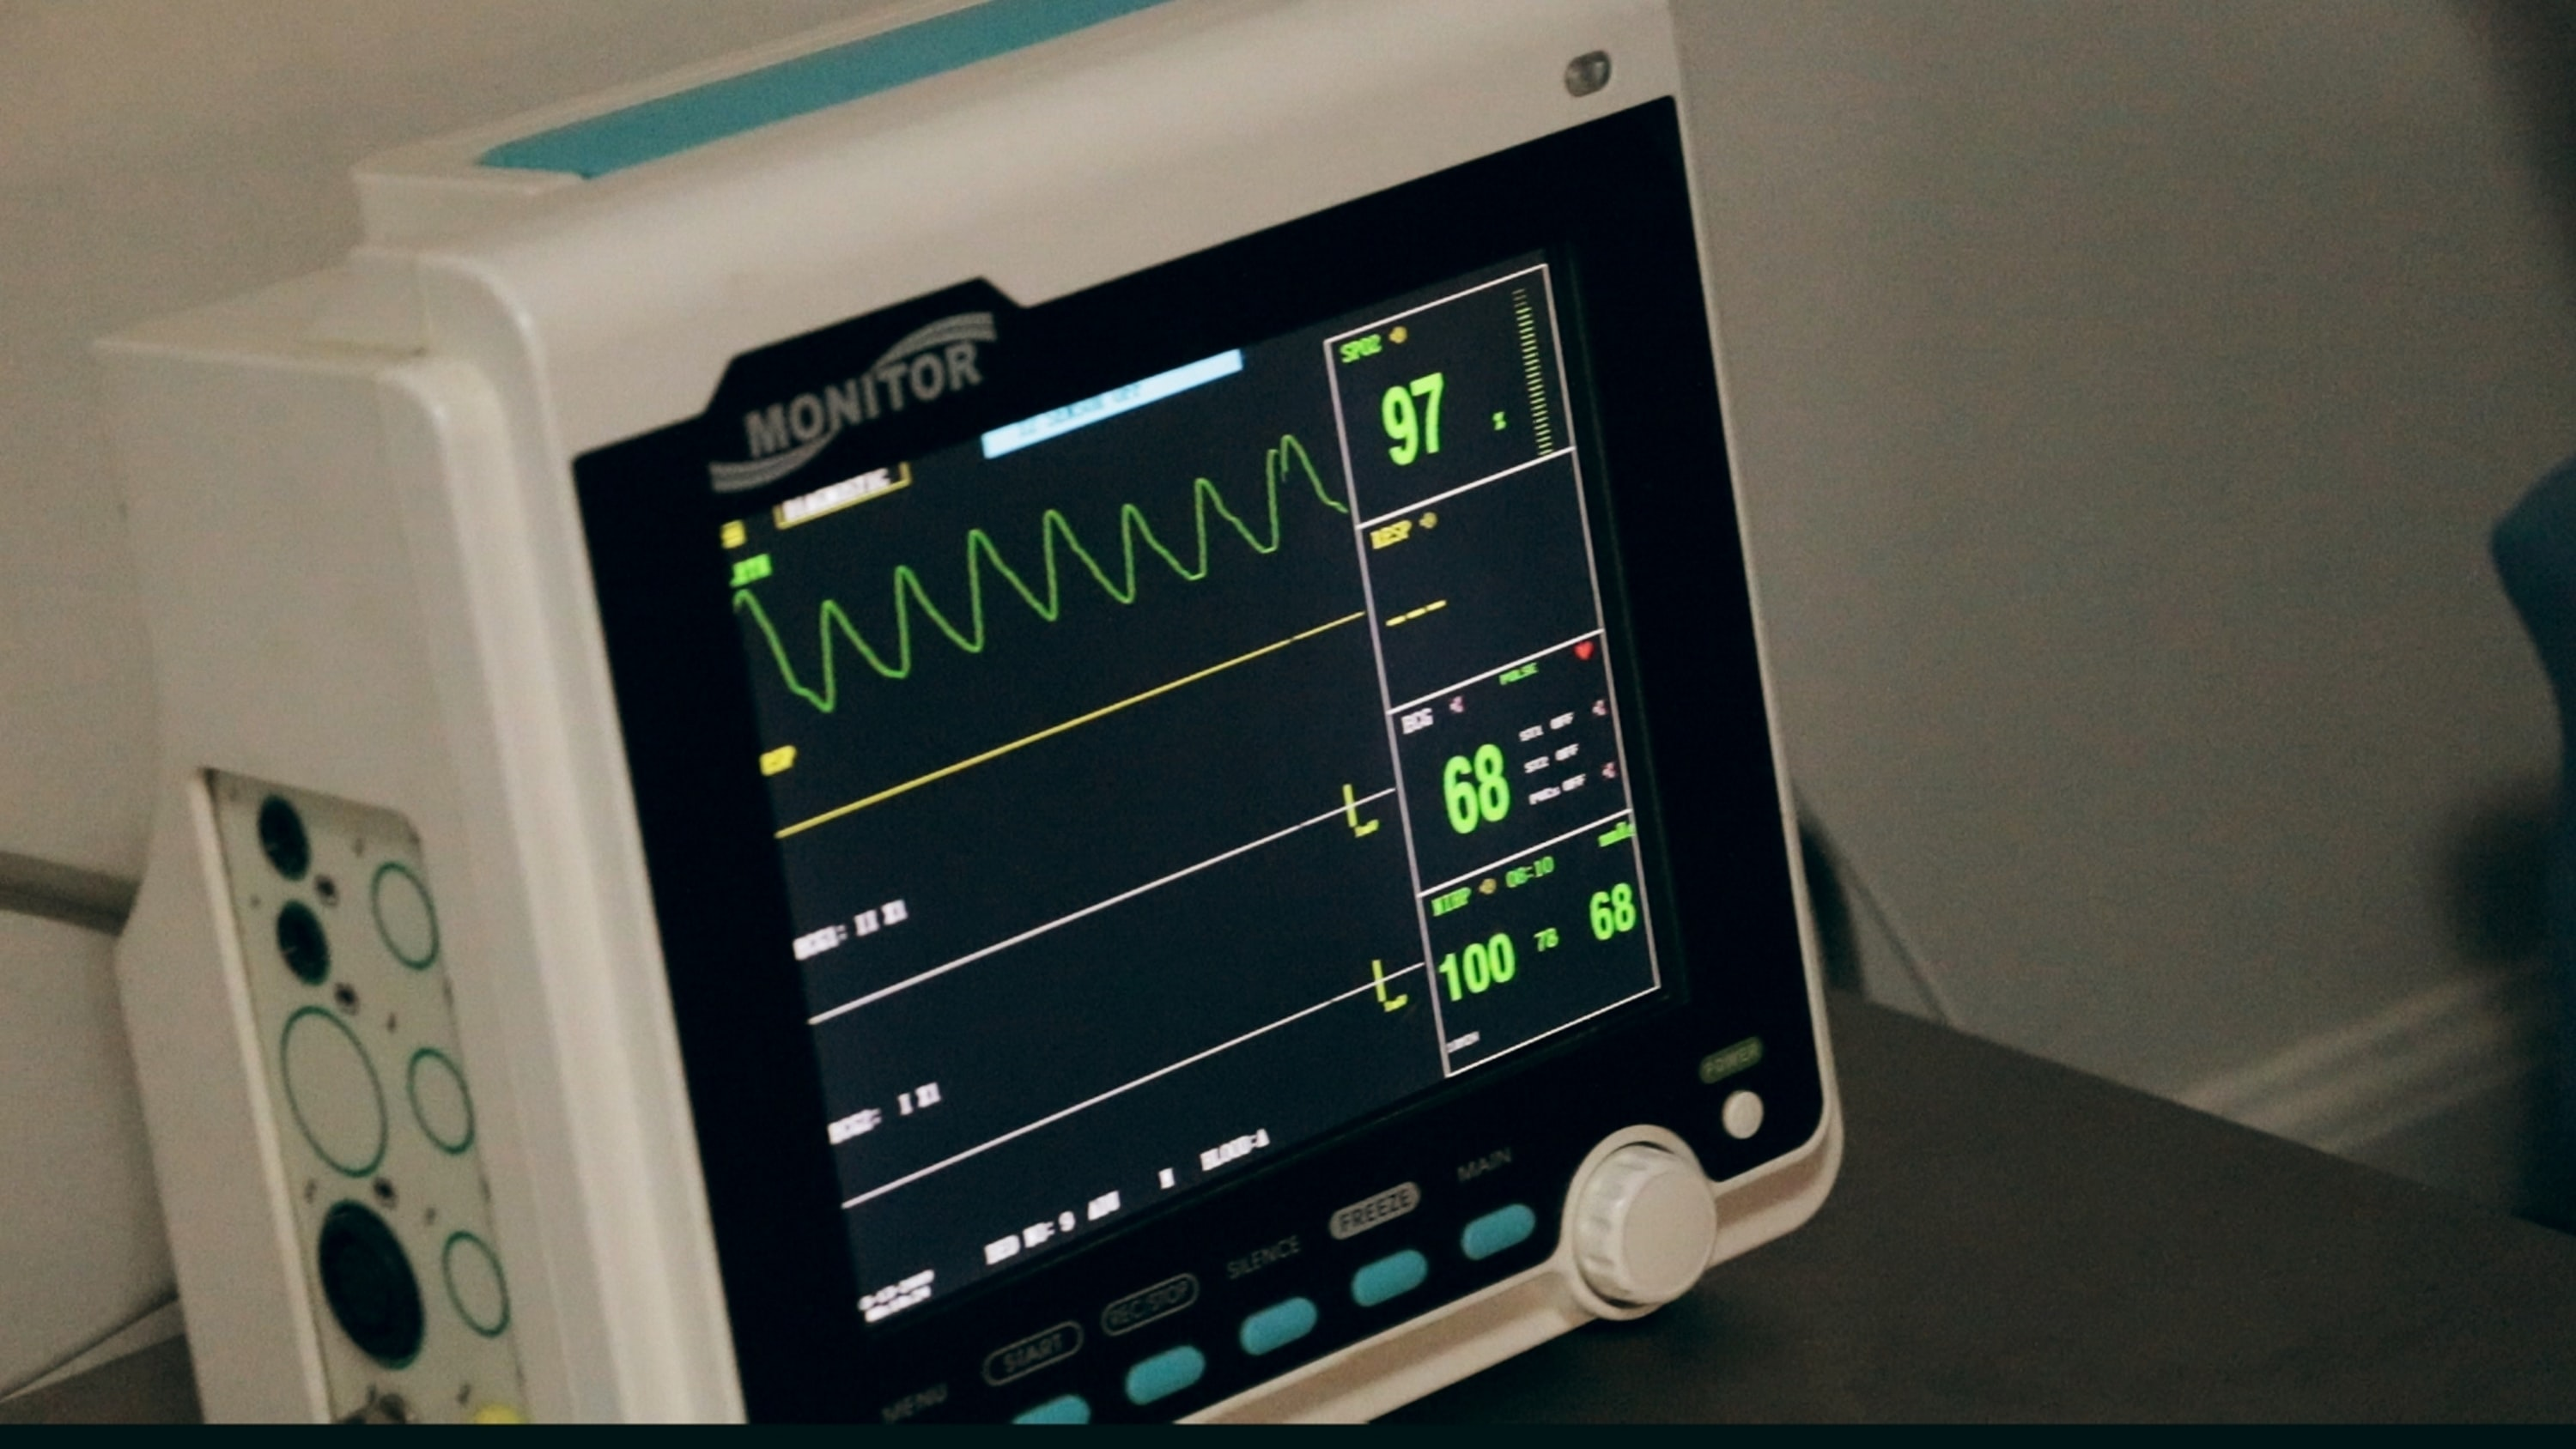



*The field of medical AI spans countless data sources, from EHR data to genetic information*

This notebook briefly explores possible directions we aim to explore after part 1.

---

Matthew Acs and Richard Acs

The first notebook in this series of notebooks explored the medical AI workflow for a simple radiology example using Keras and TensorFlow. Our first goal for this project was to attempt to use medical AI frameworks such as MONAI and PyHelath to create a model workflow, but the scope of our project changed during the early stages of research. However, this notebook attempts to use any functional code from our first experiments as a basis for next steps that we would like to explore. This notebook is our way of preserving the preliminary research that we did for this project as a future basis of exploration and experimentation. We utilized EHR data during our first experiments, and the code cells that follow will pre-process ICU EHR data from a challenge dataset using the PyHealth medical AI framework.

### Electronic Health Record Data

The first part of this notebook imports dependencies and prepares the data. For the data, we used EHR data from a challenge dataset. The PyHealth library was used to store and separate the EHR data into convenient data structures, showcasing how frameworks can greatly help the medical-AI workflow and how they merit further exploration.

In [ ]:
!git clone -b support-float-input https://github.com/sunlabuiuc/PyHealth.git
!pip install ./PyHealth

Cloning into 'PyHealth'...
remote: Enumerating objects: 4278, done.
remote: Counting objects: 100% (655/655), done.
remote: Compressing objects: 100% (218/218), done.
remote: Total 4278 (delta 504), reused 528 (delta 436), pack-reused 3623
Receiving objects: 100% (4278/4278), 98.88 MiB | 10.89 MiB/s, done.
Resolving deltas: 100% (2545/2545), done.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Processing ./PyHealth
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
     |████████████████████████████████| 29.3 MB 1.4 MB/s 
  Created wheel for pyhealth: filename=pyhealth-1.1.1-py3-none-any.whl size

Import Data

The cell below downloads the data, sets up the file structure, and displays a single ICU EHR from the dataset

In [ ]:
# importing the "tarfile" module
import tarfile
import pandas as pd
import os
  
# open file
file = tarfile.open('set-a.tar.gz')
  
# print file names
print(file.getnames())
  
# extract files
file.extractall('./Destination_FolderName')
  
# close file
file.close()

# test funcitnoality
root = './Destination_FolderName/set-a/'
test = pd.read_csv(os.path.join(root, "132540.txt"))
print(test)

['set-a', 'set-a/141834.txt', 'set-a/133786.txt', 'set-a/141492.txt', 'set-a/142386.txt', 'set-a/142258.txt', 'set-a/137799.txt', 'set-a/133131.txt', 'set-a/134476.txt', 'set-a/134262.txt', 'set-a/136897.txt', 'set-a/133152.txt', 'set-a/142591.txt', 'set-a/141346.txt', 'set-a/135841.txt', 'set-a/134487.txt', 'set-a/140762.txt', 'set-a/135556.txt', 'set-a/136006.txt', 'set-a/142621.txt', 'set-a/134067.txt', 'set-a/142213.txt', 'set-a/138496.txt', 'set-a/136812.txt', 'set-a/134193.txt', 'set-a/139104.txt', 'set-a/135630.txt', 'set-a/140054.txt', 'set-a/133993.txt', 'set-a/133649.txt', 'set-a/135195.txt', 'set-a/135561.txt', 'set-a/141511.txt', 'set-a/136512.txt', 'set-a/142009.txt', 'set-a/136784.txt', 'set-a/135207.txt', 'set-a/134453.txt', 'set-a/134133.txt', 'set-a/141916.txt', 'set-a/133611.txt', 'set-a/136459.txt', 'set-a/136474.txt', 'set-a/138093.txt', 'set-a/139015.txt', 'set-a/137137.txt', 'set-a/136536.txt', 'set-a/136576.txt', 'set-a/139045.txt', 'set-a/142029.txt', 'set-a/136

In [ ]:
data_files = []
  
# Read text File to get all data
  
# iterate through all file
for file in os.listdir(root):
    #print(file)
    next_file = pd.read_csv(os.path.join(root, file))
    #print(next_file)
    data_files.append(next_file)

The next code cell parses the data into the PyHealth data structure for EHR data

In [ ]:
import numpy as np
import pandas as pd

N_pat, N_vis = 50, 1

procedure_space = [f"prod-{i}" for i in range(100)]
condition_space = ["Albumin", "ALP", "ALT", "AST", "Bilirubin",
"BUN", "Cholesterol", "Creatinine", "DiasABP", "FiO2", "GCS",
"Glucose", "HCO3", "HCT", "HR", "K", "Lactate", "Mg", "MAP",
"MechVent", "Na", "NIDiasABP", "NIMAP", "NISysABP", "PaCO2",
"PaO2", "pH", "Platelets", "RespRate", "SaO2", "SysABP", "Temp",
"TropI", "TropT", "Urine", "WBC", "Weight"]

samples = []
for pat_i in range(N_pat):

    outcomes_df = pd.read_csv("https://raw.githubusercontent.com/racs2019/ICUdata/main/Outcomes-a.txt")
    conditions = []
    procedures = []
    for visit_j in range(N_vis):
        patient_id = data_files[pat_i].iloc[0][2]
        visit_id = f"visit-{visit_j}"

        # Conditions
        skip = 0
        for i in data_files[pat_i].itertuples():
            if skip != 0:
                conditions.append(i[2]) 
            skip = 1

        # simulate procedures to add to ehr data
        procedures.append(np.random.random(5).tolist())
        
        # which class label (patient survived or died)
        label = -1
        for i in range(outcomes_df.shape[0]):
            if outcomes_df.iloc[i][0] == patient_id:
              label = int(outcomes_df.iloc[i][5])
              break
  
        sample = {
            "patient_id": patient_id,
            "visit_id": visit_id,
            "conditions": conditions.copy(),
            "procedures": procedures.copy(),
            "age": data_files[pat_i].iloc[1][2],
            "gender": data_files[pat_i].iloc[2][2],
            "label": label
        }
        samples.append(sample)

The next two cells print the EHR records after being formatted into PyHealth's data structure

In [ ]:
# first sample
samples[0]

{'patient_id': 137663.0,
 'visit_id': 'visit-0',
 'conditions': ['Age',
  'Gender',
  'Height',
  'ICUType',
  'Weight',
  'GCS',
  'HR',
  'NIDiasABP',
  'NIMAP',
  'NISysABP',
  'Temp',
  'Urine',
  'DiasABP',
  'GCS',
  'HR',
  'MAP',
  'SysABP',
  'DiasABP',
  'HR',
  'MAP',
  'SysABP',
  'BUN',
  'Creatinine',
  'DiasABP',
  'GCS',
  'Glucose',
  'HCO3',
  'HCT',
  'HR',
  'Mg',
  'MAP',
  'Platelets',
  'K',
  'Na',
  'SysABP',
  'Urine',
  'WBC',
  'DiasABP',
  'GCS',
  'HR',
  'MAP',
  'SysABP',
  'Temp',
  'Urine',
  'DiasABP',
  'GCS',
  'HR',
  'MAP',
  'SysABP',
  'Urine',
  'DiasABP',
  'GCS',
  'HR',
  'MAP',
  'SysABP',
  'Urine',
  'DiasABP',
  'GCS',
  'HR',
  'MAP',
  'SysABP',
  'Temp',
  'Urine',
  'GCS',
  'DiasABP',
  'HR',
  'MAP',
  'SysABP',
  'DiasABP',
  'GCS',
  'HR',
  'MAP',
  'SysABP',
  'Urine',
  'DiasABP',
  'HR',
  'MAP',
  'SysABP',
  'GCS',
  'DiasABP',
  'HR',
  'MAP',
  'SysABP',
  'DiasABP',
  'GCS',
  'HR',
  'MAP',
  'SysABP',
  'Temp',
  'Urin

In [ ]:
# second sample
samples[1]

{'patient_id': 139404.0,
 'visit_id': 'visit-0',
 'conditions': ['Age',
  'Gender',
  'Height',
  'ICUType',
  'Weight',
  'DiasABP',
  'GCS',
  'HR',
  'NIDiasABP',
  'NIMAP',
  'NISysABP',
  'SysABP',
  'Temp',
  'DiasABP',
  'HR',
  'MAP',
  'NIDiasABP',
  'NIMAP',
  'NISysABP',
  'SysABP',
  'Urine',
  'DiasABP',
  'HR',
  'MAP',
  'NIDiasABP',
  'NIMAP',
  'NISysABP',
  'SysABP',
  'BUN',
  'Creatinine',
  'DiasABP',
  'GCS',
  'Glucose',
  'HCO3',
  'HCT',
  'HR',
  'Mg',
  'MAP',
  'NIDiasABP',
  'NIMAP',
  'NISysABP',
  'Platelets',
  'K',
  'Na',
  'SysABP',
  'Temp',
  'TroponinT',
  'Urine',
  'WBC',
  'DiasABP',
  'GCS',
  'HR',
  'MAP',
  'SysABP',
  'Urine',
  'DiasABP',
  'GCS',
  'HR',
  'MAP',
  'SysABP',
  'Urine',
  'DiasABP',
  'GCS',
  'HR',
  'MAP',
  'SysABP',
  'Urine',
  'DiasABP',
  'GCS',
  'HR',
  'MAP',
  'SysABP',
  'Temp',
  'Urine',
  'DiasABP',
  'HR',
  'MAP',
  'SysABP',
  'Urine',
  'DiasABP',
  'HR',
  'MAP',
  'SysABP',
  'Urine',
  'DiasABP',
  'G

Although we did not train a successful model through PyHealth, the data structures, modules, and functionality provided by PyHealth merit further exploration. PyHelath gave us the impression that it could help simplify the process of preprocessing, sorting, and exploring textual health data such as EHRs. Our future projects will involve attempting to take the notebook from this point and further explore PyHealth functionality and (attempt) to train a model on the data through PyHealth.

## Next Steps


---


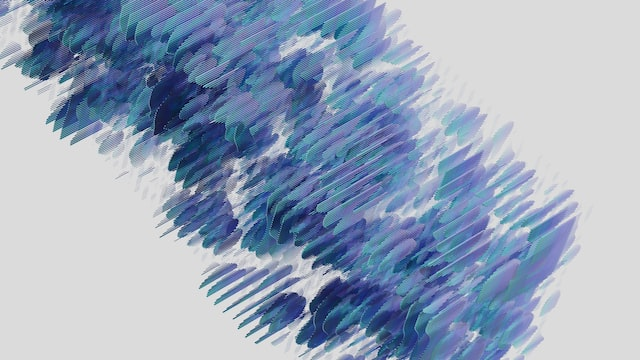

In part one, a CNN was developed that classified chest x-rays based on the presence of pneumonia. The notebook served as an end-to-end example of how a medical dataset can be used to develop image classification solutions. It explored many different concepts including data exploration and preparation, model development and training, and model evaluation and visualization. However, an exploration of the topic is far from complete without a proper discussion on the next steps. The notebook showed how a model could be developed for a specific dataset of chest x-rays. This naturally leads to the possibility of using other datasets in the domain of medicine. MRIs, x-rays, and CT scans all lend themselves to possible deep learning applications for image classification. Other medical specialties outside of radiology also have opportunities to use classification techniques. For instance, skin lesion classification based on images could assist dermatologists. Working with different mediums of medical data will reveal the nuances of each one. Another possible future direction that continues from the discussions in part one is model architectures. The CNN we used was only one possible architecture we could have used. Transfer learning could have also been applied as well as more complex bespoke architectures. Experimenting with and developing novel architectures may reveal designs that work well for certain image classification tasks within the medical domain. This is especially true due to the unique, high-stakes nature of the medical domain. False negatives are potentially far more dangerous than false positives. Finally, as briefly explored in this notebook, many frameworks exist for medical AI. Exploring and using frameworks such as MONAI and PyHealth may improve the robustness of deep learning solutions as well as increase the speed of development.

## References

---

The sources below are links to various resources that we utilized while working on this project.
  

- Cover Photo by <a href="https://unsplash.com/@jairlazarofuentes?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Jair Lázaro</a> on <a href="https://unsplash.com/s/photos/heart-monitor?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a>

> *Image credit for cover photo*

- Next Steps Photo by <a href="https://unsplash.com/@deepmind?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">DeepMind</a> on <a href="https://unsplash.com/s/photos/AI?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a>

> *Image credit for next steps section photo*

- https://pyhealth.readthedocs.io/en/latest/

> *PyHealth*